In [8]:
# pip install --upgrade tensorflow keras

In [14]:
import tensorflow as tf

In [15]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, GlobalMaxPooling2D
from tensorflow.keras.models import Model

# Load the Data

In [6]:
cifar10 = tf.keras.datasets.cifar10

In [7]:
(X_train,y_train),(X_test,y_test) = cifar10.load_data()

X_train,X_test = X_train/255.0, X_test/ 255.0
y_train,y_test = y_train.flatten(), y_test.flatten() 

print("x train.shape: ", X_train.shape)
print("y train.shape: ",y_train.shape)

170498071/170498071 [==============================] - 1665s 10us/step
x train.shape:  (50000, 32, 32, 3)
y train.shape:  (50000,)


In [23]:
# Number of classes

K= len(set(y_train))
print("Number of classes: ",K)

Number of classes:  10


# Build the model using functional API

In [24]:
# i is input 
# x is output

i = Input(shape=X_train[0].shape)
x = Conv2D(32, (3,3), strides= 2, activation='relu')(i)
x = Conv2D(64, (3,3), strides= 2, activation='relu')(x)
x = Conv2D(128, (3,3), strides= 2, activation='relu')(x)
x = Flatten()(x)
x = Dropout(0.5)(x)
x = Dense(1024, activation= 'relu')(x)
x=  Dropout(0.2)(x)
x = Dense(K, activation= 'softmax')(x)


model = Model(i,x)

# Compile and Fit

In [25]:
model.compile(optimizer= 'adam',
             loss= 'sparse_categorical_crossentropy',
             metrics= ['accuracy'])

r= model.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=15)

Epoch 1/15
1563/1563 [==============================] - 32s 20ms/step - loss: 1.5937 - accuracy: 0.4144 - val_loss: 1.2760 - val_accuracy: 0.5354
Epoch 2/15
1563/1563 [==============================] - 30s 19ms/step - loss: 1.3012 - accuracy: 0.5304 - val_loss: 1.1727 - val_accuracy: 0.5693
Epoch 3/15
1563/1563 [==============================] - 30s 19ms/step - loss: 1.1678 - accuracy: 0.5832 - val_loss: 1.0899 - val_accuracy: 0.6010
Epoch 4/15
1563/1563 [==============================] - 30s 19ms/step - loss: 1.0756 - accuracy: 0.6160 - val_loss: 0.9963 - val_accuracy: 0.6462
Epoch 5/15
1563/1563 [==============================] - 31s 20ms/step - loss: 0.9947 - accuracy: 0.6432 - val_loss: 0.9787 - val_accuracy: 0.6561
Epoch 6/15
1563/1563 [==============================] - 31s 20ms/step - loss: 0.9418 - accuracy: 0.6661 - val_loss: 0.9088 - val_accuracy: 0.6831
Epoch 7/15
1563/1563 [==============================] - 31s 20ms/step - loss: 0.8872 - accuracy: 0.6839 - val_loss: 0.8885 -

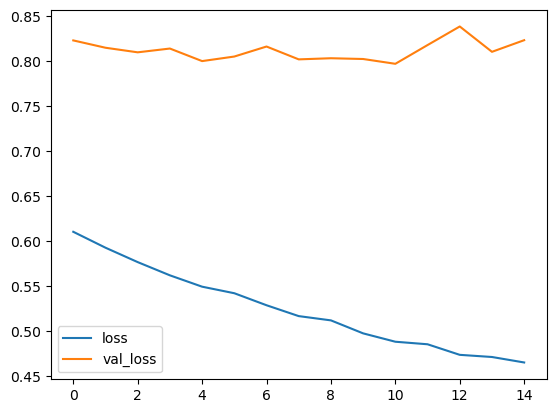

In [21]:
# Plot loss per iteration

plt.plot(r.history['loss'], label= 'loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

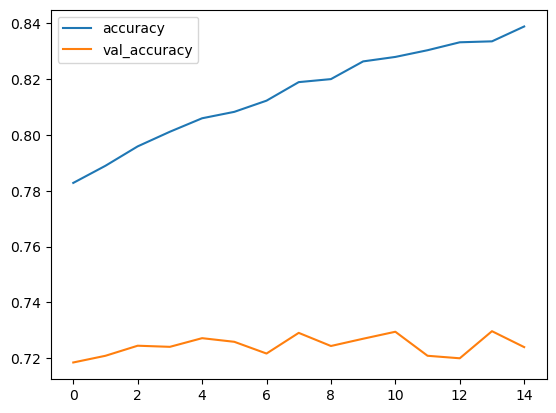

In [22]:
plt.plot(r.history['accuracy'], label= 'accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()